In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('BlinkIT_Data.csv')

In [13]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [14]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [17]:
print("size of data: ",df.shape)

size of data:  (8523, 12)


In [18]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Sales', 'Rating'],
      dtype='object')

In [19]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [24]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat']


In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                        'low fat': 'Low Fat',
                                                        'reg':'Regular'})

## **BUSINESS REQURMENTS**

## **KPI's REQURMENTS**

In [36]:
# Total sales

total_sales = df['Sales'].sum()

#Average sales
Average_sales = df['Sales'].mean()

# No of items sold
No_of_items_sold = df['Sales'].count()

# Average ratings
Average_ratings = df['Sales'].mean()

print(total_sales)
print(Average_sales)
print(No_of_items_sold)
print(Average_ratings)

1201681.4928
140.99278338613163
8523
140.99278338613163


## **CHARTS REQURMENTS**

## Total sales by fat content


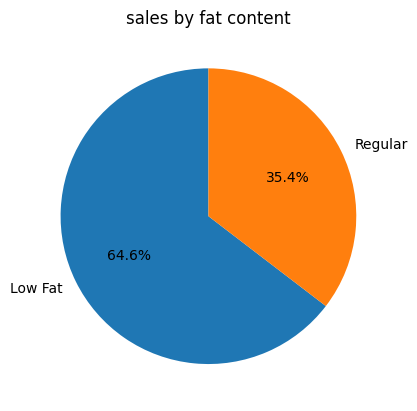

In [45]:
sales_by_fat = df.groupby('Item_Fat_Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
                          autopct = '%.1f%%',
                          startangle = 90)
plt.title('sales by fat content')
plt.show()

## TOTAL SALES BY ITEMS TYPE

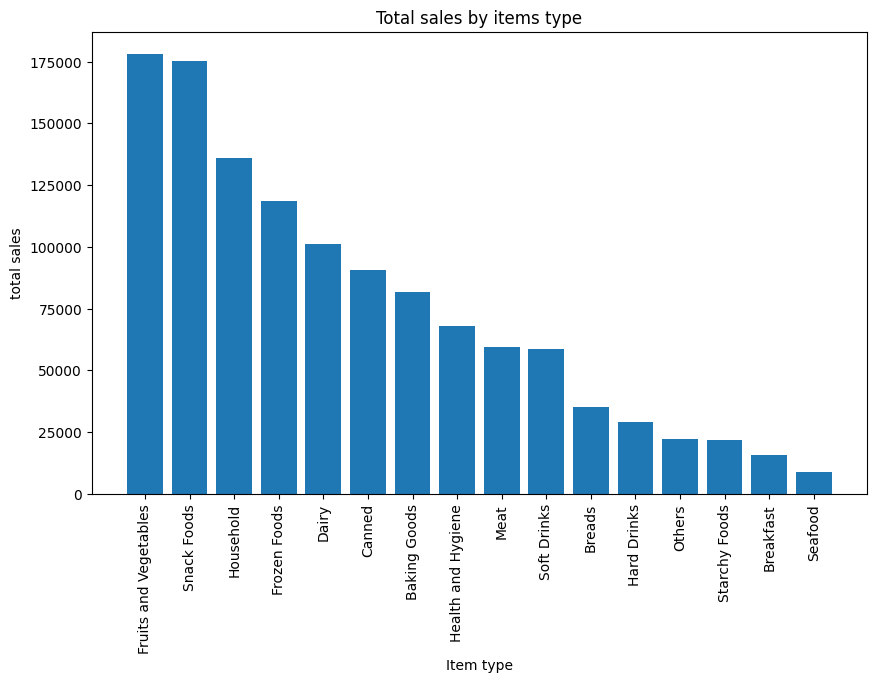

In [49]:
sales_by_type = df.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)  
plt.xlabel('Item type')
plt.ylabel('total sales')
plt.title('Total sales by items type')
plt.show()

## fat content by outlet for total sales

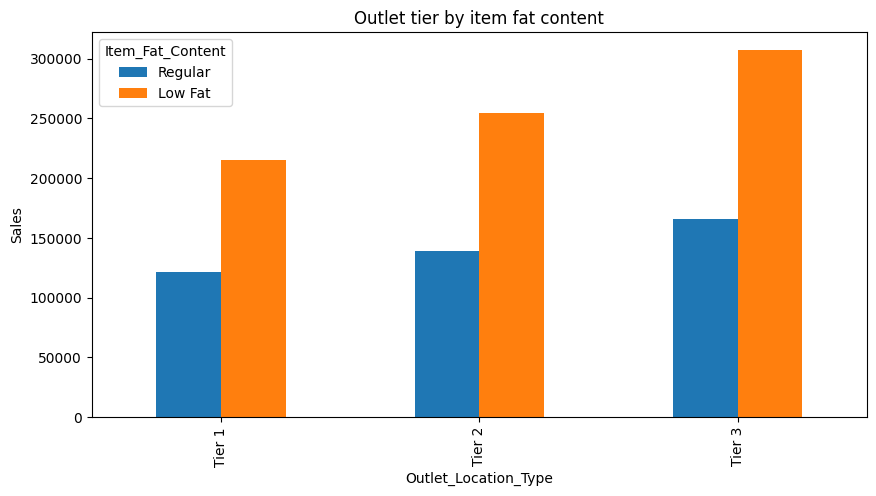

In [52]:
grouped = df.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]  

ax = grouped.plot(kind='bar', figsize=(10,5), title='Outlet tier by item fat content')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Sales')
plt.show()

## TOTAL SALES BY OUTLET ESTABLISHMENT

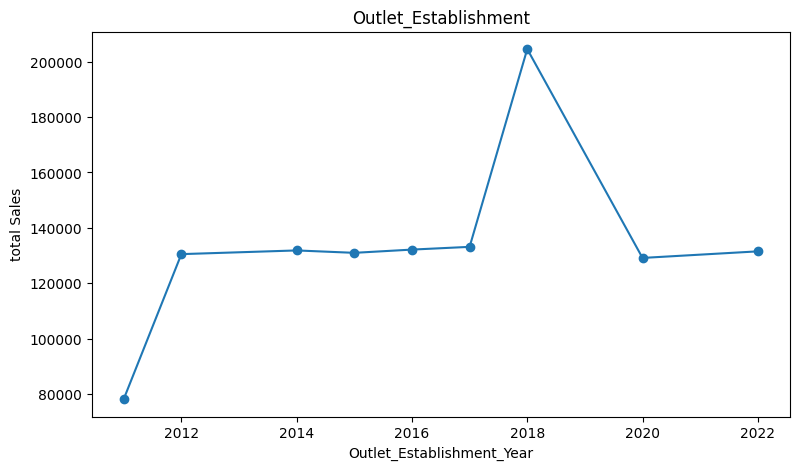

In [54]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))  
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle= '-')

plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('total Sales')
plt.title('Outlet_Establishment')
plt.show()

## SALES BY OUTLET SIZE

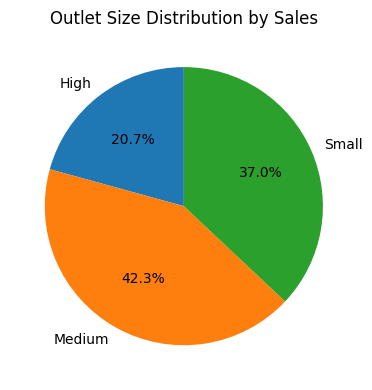

In [58]:
sales_by_size = df.groupby('Outlet_Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size Distribution by Sales')
plt.tight_layout()
plt.show()

## sales by outlet location

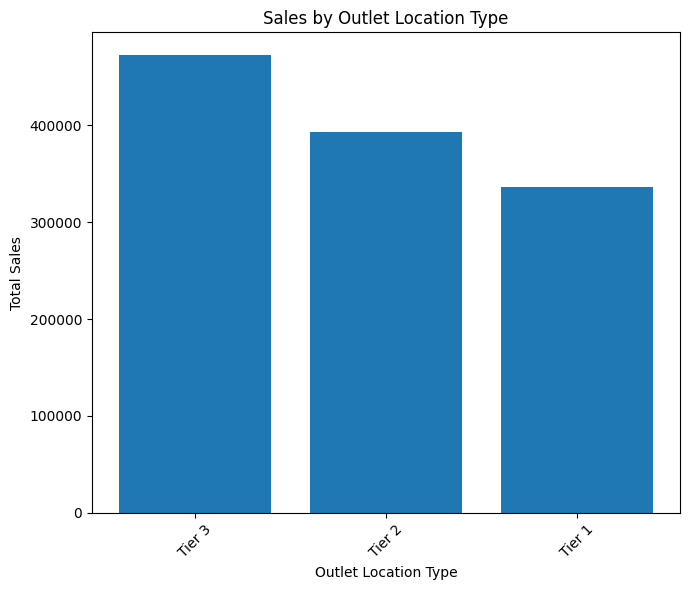

In [64]:
sales_by_location = df.groupby('Outlet_Location_Type')['Sales'].sum().reset_index()  
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(7, 6))
plt.bar(sales_by_location['Outlet_Location_Type'], sales_by_location['Sales'])
plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()